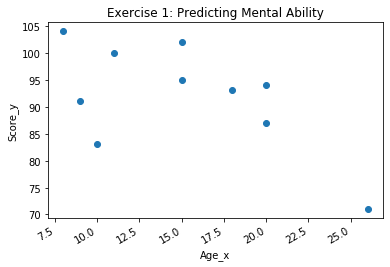

Exercise 1: Predicting Mental Ability--> Pearson Correlation using formula: -0.5973
Exercise 1: Predicting Mental Ability--> Pearson Correlation using Python Library: -0.5973


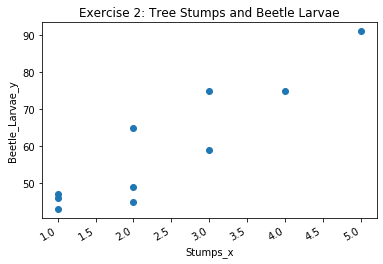

Exercise 2: Tree Stumps and Beetle Larvae--> Pearson Correlation using formula: 0.9158
Exercise 2: Tree Stumps and Beetle Larvae--> Pearson Correlation using Python Library: 0.9158


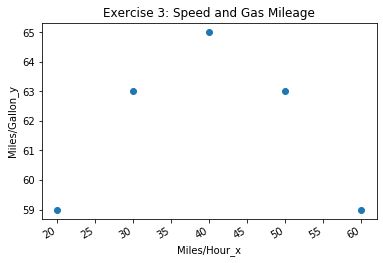

Exercise 3: Speed and Gas Mileage--> Pearson Correlation using formula: 0.0000
Exercise 3: Speed and Gas Mileage--> Pearson Correlation using Python Library: -0.0000


In [3]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import math

def ScatterPlot(X, Y, x_axis, y_axis, Title):
    plt.scatter(X, Y)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(Title)
    plt.gcf().autofmt_xdate()
    plt.show()

def mean(x):
    sum = 0.0
    for i in x:
         sum += i
    return float(sum / len(x))

#sd(x)=sqrt( (xi-mean(x))^2 / n-1 )
def standardDeviation(x):
    sum_sd = 0.0
    for i in x:
         sum_sd += (i - mean(x))**2
    return math.sqrt(sum_sd/(len(x)-1))

#covariance(x,y)=sum(xi-mean(x)* yi-mean(y))/ n-1
def covariance(x,y):
    cov_xy = []
    for i,j in zip(x,y):
        x1 = i-mean(x)
        y1 = j-mean(y)
        cov_xy.append(x1*y1)
    cov = sum(cov_xy)
    return cov/(len(x)-1)

#correlation(x,y)=covariance(x,y)/sd(x)*sd(y)
def correlation(x, y):
    corr = (covariance(x,y)) / (standardDeviation(x)*standardDeviation(y))
    return corr

def PearsonSolution(FileName, x_axis, y_axis, Title):
    df = pd.read_csv(FileName, dtype={x_axis: float, y_axis: float})
    X = df[x_axis]
    Y = df[y_axis]
    ScatterPlot(X, Y, x_axis, y_axis, Title)
    print(Title + '--> Pearson Correlation using formula: %.4f' % correlation(X, Y))
    pearsoncorr, _ = pearsonr(X, Y)
    print(Title + '--> Pearson Correlation using Python Library: %.4f' % pearsoncorr)


PearsonSolution("Pearson_Prob_1.csv","Age_x", "Score_y", "Exercise 1: Predicting Mental Ability" )
PearsonSolution("Pearson_Prob_2.csv","Stumps_x", "Beetle_Larvae_y", "Exercise 2: Tree Stumps and Beetle Larvae" )
PearsonSolution("Pearson_Prob_3.csv","Miles/Hour_x", "Miles/Gallon_y", "Exercise 3: Speed and Gas Mileage" )
